
## Simulating Population Growth, Mutation, and the fixation of alleles



In [28]:
import random
import numpy as np
from matplotlib import pyplot as plt

## Exponential growth

Write a function, `doublings` which takens as input a single argument, `ngens`, where `ngens` is the number of generations to simulate.

Your function should simulate the change in population size over time, given the following constraints:

1. The initial population size is 1
2. Every individual alive at the beginning of a generation gives rise to one new individual

Your function should return a list of the population sizes for each generation of the simulation.


In [55]:
def doublings(ngens):
    return [pow(2, i) for i in range(ngens)]

Create a plot of population size over time for 30 generations of the simulation.

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912]


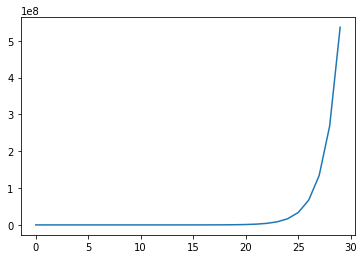

In [208]:
x = 30
counter = []

generations = doublings(x)
for i in range(x):
    counter += [i]
print(generations)
plt.plot(counter, generations)

## Growth and death

Create another function, `doublings_death`, which takens as input two argument, `ngens` and `death_rate`, where `ngens` is the number of generations to simulate and `death_rate` is the fraction of the population that dies each generation (a floating point value between 0 and 1)

Your function should simulate the change in population size over time, given the following constraints:

1. The initial population size is 1
2. Every individual alive at the beginning of a generation gives rise to one new individual
3. After reproducing individuals die at a rate given by `death_rate`

Your function should return a list of the population sizes for each generation of the simulation.


In [228]:
def doublings_death(ngens, death_rate):
    return_list = [1]
    for i in range(ngens):
        total = np.around(return_list[-1]*2 - death_rate*return_list[-1])
        #total = np.around(pow(2, i) - 2*death_rate*return_list[-1])
        return_list.append(total)
    #return_list.remove(1)
    return return_list
a = doublings_death(30, .25)
print(a)

[1, 2.0, 4.0, 7.0, 12.0, 21.0, 37.0, 65.0, 114.0, 200.0, 350.0, 612.0, 1071.0, 1874.0, 3280.0, 5740.0, 10045.0, 17579.0, 30763.0, 53835.0, 94211.0, 164869.0, 288521.0, 504912.0, 883596.0, 1546293.0, 2706013.0, 4735523.0, 8287165.0, 14502539.0, 25379443.0]


Create plots (on the same axes) of population size over time for 30 generations of the simulation, with death rates of 0.01, 0.1, 0.25.  Compare these to the results from `doublings` above.

[1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 127.0, 253.0, 503.0, 1001.0, 1992.0, 3964.0, 7888.0, 15697.0, 31237.0, 62162.0, 123702.0, 246167.0, 489872.0, 974845.0, 1939942.0, 3860485.0, 7682365.0, 15287906.0, 30422933.0, 60541637.0, 120477858.0, 239750937.0, 477104365.0, 949437686.0]


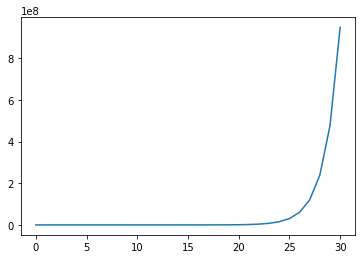

In [231]:
x = 30
counter = []
for i in range(x+1):
    counter += [i]

generations1 = doublings_death(x, .01)
print(generations1)
plt.plot(counter, generations1)

[1, 2.0, 4.0, 8.0, 15.0, 28.0, 53.0, 101.0, 192.0, 365.0, 694.0, 1319.0, 2506.0, 4761.0, 9046.0, 17187.0, 32655.0, 62044.0, 117884.0, 223980.0, 425562.0, 808568.0, 1536279.0, 2918930.0, 5545967.0, 10537337.0, 20020940.0, 38039786.0, 72275593.0, 137323627.0, 260914891.0]


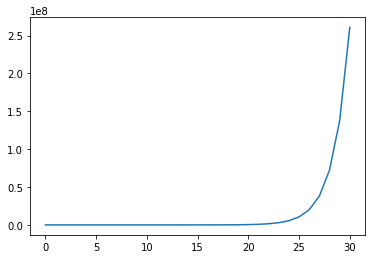

In [232]:
generations2 = doublings_death(x, .1)
print(generations2)
plt.plot(counter, generations2)

[1, 2.0, 4.0, 7.0, 12.0, 21.0, 37.0, 65.0, 114.0, 200.0, 350.0, 612.0, 1071.0, 1874.0, 3280.0, 5740.0, 10045.0, 17579.0, 30763.0, 53835.0, 94211.0, 164869.0, 288521.0, 504912.0, 883596.0, 1546293.0, 2706013.0, 4735523.0, 8287165.0, 14502539.0, 25379443.0]


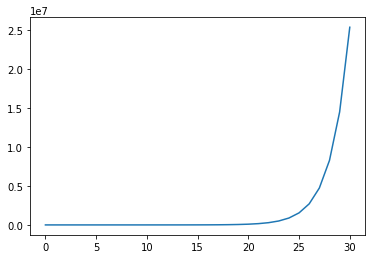

In [233]:
generations3 = doublings_death(x,.25)
print(generations3)
plt.plot(counter, generations3)

## Growth plus density dependent death

Create another function, `doublings_density`, which takens as input two argument, `ngens`, `death_rate`, where `ngens` is the number of generations to simulate and `death_rate` is density dependent death rate (see below).

Your function should simulate the change in population size over time, given the following constraints:

1. The initial population size is 1
2. Every individual alive at the beginning of a generation gives rise to one new individual
3. After reproduction, individuals die at a rate given by `min(1, death_rate * population size)`

Your function should return a list of the population sizes for each generation of the simulation.


In [223]:
def doublings_density(ngens, death_rate):
    return_list = [1]
    return_list = [np.around(pow(2,i) - min(1, death_rate * pow(2,i-1))) for i in range(ngens)]
    #return_list = [np.around(pow(2,i) - min(1, death_rate * return_list[-1])) for i in range(ngens)]
    return return_list
generations = doublings_density(10, .25)
print(generations)

[1.0, 2.0, 4.0, 7, 15, 31, 63, 127, 255, 511]


Create plots of population size over time for 30 generations of the simulation, with death rates of 0.01, 0.001, 0.0001, and 0.0001.  Compare these to the results from `doublings` above.  How does the final population size relate to the desnity dependent death rate?

[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 127.0, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 131071, 262143, 524287, 1048575, 2097151, 4194303, 8388607, 16777215, 33554431, 67108863, 134217727, 268435455, 536870911]


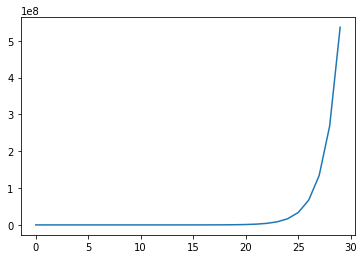

In [224]:
x = 30
counter = []
for i in range(x):
    counter += [i]

generations1 = doublings_density(x, .01)
print(generations1)
plt.plot(counter, generations1)

[1.0, 2.0, 4.0, 8.0, 15.0, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 131071, 262143, 524287, 1048575, 2097151, 4194303, 8388607, 16777215, 33554431, 67108863, 134217727, 268435455, 536870911]


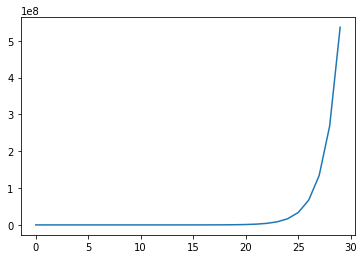

In [225]:
generations2 = doublings_density(x, .1)
print(generations2)
plt.plot(counter, generations2)

[1.0, 2.0, 4.0, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 131071, 262143, 524287, 1048575, 2097151, 4194303, 8388607, 16777215, 33554431, 67108863, 134217727, 268435455, 536870911]


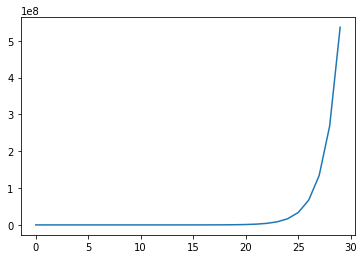

In [226]:
generations3 = doublings_density(x,.25)
print(generations3)
plt.plot(counter, generations3)

# Simulating a neutral mutation in population with a constant size



Imagine a new mutation appears is introduced at a fraction $p$ into population of size $N$. Assume that individuals with the mutation reproduce at the same rate as those without the mutation, and that population size stays constant over time (i.e. birth and death rates are equal). Write a function to simulate the fraction of individuals with the mutation over time.

In [26]:
def neutral_mutation(p, N, ngens):
    